In [29]:
#All libraries for this analysis are written here

import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

#### **We started by checking what is in the csv files and performing exploratory analysis:**

In [3]:
# loading the data
cash_request = pd.read_csv('extract - cash request - data analyst.csv')
extract_fees = pd.read_csv('extract - fees - data analyst - .csv')

In [4]:
#Checking details of the data (we can see by the head and tail that the data is consistent from top to bottom)

cash_request.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [5]:
cash_request.tail()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN
23969,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,NaN,instant,2020-10-08 14:17:04.526139+00,NaN,NaN,NaN


In [6]:
cash_request['id'].count() #to see the number of records

23970

In [8]:
"""Checking the null values:
The user_id and the deleted_account_id are complementary. there's only 1 row where both fields are null.
If user id is null, delete_account_it correctly replaces it.
There's a strong relation between recovery_status, reco_creation and reco_last_update.
It's clear that if there's any recover, they are filled, otherwise they are null.

The good thing is that columns id, amount, status and created_at have no null amounts.
These are key columns to analyse cash requests over time and the user behaviour.
"""

cash_request.isnull().sum()


,0
id,0
amount,0
status,0
created_at,0
updated_at,0
user_id,2103
moderated_at,7935
deleted_account_id,21866
reimbursement_date,0
cash_request_received_date,7681


In [10]:
'''The quantiles show that most of the users are concentrated between 100€.
The Q2 might be at 50€, because the Q1 is at 1€, wich strongly suggests that the great majority of the users are requesting 100€.
However, we must analyse unique users and also there are columns with rejections, which leads to the conclusion that many of these requests are not to be considered.
'''
cash_request.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [11]:
'''The samples help to reasure that user id and deleted_account_id have opposite null rows.
Also, it leads to the understanding that non rejected payments have the incidents resolved'''
cash_request.sample(20)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
18884,14586,50.0,money_back,2020-09-04 20:57:24.349446+00,2020-12-18 13:11:53.890293+00,6929.0,2020-09-05 07:01:38.756336+00,NaN,2020-09-29 22:00:00+00,2020-09-08,2020-10-27 14:45:28.852731+00,instant,2020-09-11 20:57:24.273737+00,completed,2020-10-11 22:10:42.390347+00,2020-10-27 14:45:28.873626+00
16595,13368,100.0,money_back,2020-08-20 17:05:47.30985+00,2020-12-18 13:10:57.975752+00,7577.0,2020-08-20 17:16:54.283135+00,NaN,2020-09-07 22:00:00+00,2020-08-22,2020-10-08 22:00:00+00,instant,2020-08-27 17:05:47.26931+00,completed,2020-09-09 20:52:21.334514+00,2020-09-09 20:52:21.334525+00
14257,7246,100.0,money_back,2020-07-08 22:05:49.796154+00,2020-12-18 13:10:04.667891+00,18260.0,2020-07-09 08:57:28.662982+00,NaN,2020-08-05 23:51:00+00,2020-07-10,2020-08-06 22:00:00+00,regular,NaN,NaN,NaN,NaN
5922,10496,50.0,direct_debit_rejected,2020-08-01 18:03:05.695474+00,2020-10-15 22:50:41.509989+00,32693.0,2020-08-02 15:19:45.604757+00,NaN,2020-09-06 22:00:00+00,2020-08-05,NaN,instant,2020-08-08 18:03:05.695002+00,pending,2020-10-15 22:50:38.16913+00,2020-10-15 22:50:41.521348+00
21502,25984,100.0,money_back,2020-10-29 09:08:49.522634+00,2020-12-18 13:12:57.892587+00,98340.0,NaN,NaN,2020-11-25 23:00:00+00,2020-10-30,2020-11-26 19:11:51.619827+00,instant,2020-10-29 09:09:07.824869+00,NaN,NaN,NaN
23262,16884,50.0,money_back,2020-09-19 14:37:55.786173+00,2020-12-18 13:14:33.920846+00,43622.0,2020-09-19 16:38:47.961104+00,NaN,2020-11-04 22:00:00+00,2020-09-22,2020-12-04 22:01:36.061889+00,instant,2020-09-26 14:37:55.744049+00,completed,2020-11-15 22:45:13.59194+00,2020-12-04 22:01:36.066878+00
23216,25293,25.0,money_back,2020-10-27 16:22:34.396868+00,2020-12-18 13:14:32.281274+00,85339.0,NaN,NaN,2020-11-07 23:00:00+00,2020-10-28,2020-11-19 13:44:58.363718+00,instant,2020-10-27 16:25:12.105909+00,completed,2020-11-15 22:14:30.999484+00,2020-11-19 13:44:58.380967+00
10198,23275,100.0,money_back,2020-10-23 05:43:18.834241+00,2021-01-29 13:42:03.35928+00,88037.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-24,2021-01-29 13:42:03.318527+00,instant,2020-10-23 05:43:32.672976+00,NaN,NaN,NaN
4350,9090,50.0,rejected,2020-07-20 13:50:54.40582+00,2020-07-20 19:12:16.465768+00,2142.0,2020-07-20 19:12:16.46307+00,NaN,2020-08-05 22:00:00+00,NaN,NaN,regular,2020-07-27 13:50:54.405172+00,NaN,NaN,NaN
12167,6292,100.0,money_back,2020-07-02 14:13:29.802116+00,2020-12-18 13:09:18.59953+00,27151.0,2020-07-02 18:05:46.858005+00,NaN,2020-07-27 22:00:00+00,2020-07-04,2020-07-29 22:00:00+00,regular,NaN,NaN,NaN,NaN


In [13]:
cash_request['user_id'].nunique() #The number of user_ids being less than 50% of the total ids, confirms that users are returning or trying the service multiple times.

10798

In [14]:
cash_request['status'].value_counts() #Here there's an overview about accepted and rejected requests.

,count
status,
money_back,16397
rejected,6568
direct_debit_rejected,831
active,59
transaction_declined,48
direct_debit_sent,34
canceled,33


In [15]:
extract_fees.head() #extract_fee is also consistend from the top to the bottom.

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [16]:
extract_fees.tail()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after
21060,13301,20982.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 20982,2020-10-14 07:12:43.958192+00,2020-10-14 07:12:43.958219+00,2021-02-12 13:02:46.95022+00,NaN,NaN,after


In [17]:
extract_fees['status'].value_counts() #here we have an overview about the resolutions of the incidents.

,count
status,
accepted,14841
cancelled,4938
rejected,1194
confirmed,88


In [18]:
extract_fees['category'].value_counts() # The category shows that cards declined are the main reason of incidents.

,count
category,
rejected_direct_debit,1599
month_delay_on_payment,597


In [21]:
extract_fees.sample(10) # By the sample, it looks like the company do not reject customer that pay the charge upfront

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
853,11018,19231.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19231,2020-10-05 10:34:50.441799+00,2020-10-13 14:25:03.800547+00,2020-10-30 19:30:31.48019+00,NaN,NaN,after
15912,347,2640.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 2640,2020-06-23 08:20:51.296795+00,2020-10-13 14:25:15.196644+00,NaN,2020-06-28 22:00:00+00,2020-07-28 22:00:00+00,after
11558,4855,8977.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-08-22 22:14:27.540527+00,2020-10-13 14:25:07.176809+00,2020-09-04 04:01:16.731678+00,NaN,NaN,after
8124,16859,23910.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23910,2020-10-24 07:22:41.853743+00,2020-10-24 07:22:41.853765+00,2020-11-05 20:43:05.47392+00,NaN,NaN,after
11278,4498,13369.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 13369,2020-08-20 17:16:34.567644+00,2020-10-13 14:25:06.721596+00,2020-09-15 19:47:30.555313+00,NaN,NaN,after
12248,5709,14223.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 14223,2020-09-02 08:28:42.811323+00,2020-10-13 14:25:08.284372+00,2020-10-09 19:33:43.347321+00,NaN,NaN,after
1833,1082,3802.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3802,2020-07-05 16:06:04.539459+00,2020-10-13 14:25:01.978702+00,2020-07-05 16:06:09.055649+00,2020-07-24 22:00:00+00,2020-08-08 22:00:00+00,before
10237,10156,16535.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 16535,2020-10-01 03:08:08.720994+00,2020-10-13 14:25:04.831219+00,NaN,2020-10-05 22:00:00+00,2020-10-29 23:00:00+00,after
17067,4179,12329.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 12329,2020-08-18 03:00:13.627336+00,2020-10-13 14:25:16.82504+00,NaN,2020-08-27 10:13:58.448+00,2020-09-04 22:00:00+00,after
20227,19930,4997.0,incident,accepted,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-29 22:52:06.320555+00,2020-10-29 22:52:06.320574+00,2021-01-15 16:06:00.108199+00,NaN,NaN,after


In [24]:
extract_fees[((extract_fees['type'] == 'cancelled') | (extract_fees['type'] == 'rejected')) & (extract_fees['charge_moment'] == 'before')] #here we can see that no rejection existes for charges upfront.

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment


In [26]:
'''The extract_fees is pretty consistent.
The category, for example is only filled when an incident takes place.
The paid at, only have values if a payment is scheduled'''

extract_fees.isnull().sum()



,0
id,0
cash_request_id,4
type,0
status,0
category,18865
total_amount,0
reason,0
created_at,0
updated_at,0
paid_at,5530


### **Start cleaning the data**.
##### The data must be cleaned, for better exploration.


##### **cash_request df:** <br>
<br>

id - ok (int) <br>
amount - round float to 2 decimals<br>
status - ok (str)<br>
created_at - clean dates<br>
updated_at - clean dates<br>
user_id - transform in int<br>
moderated_at - clean dates <br>
deleted_account_id - transform in int<br>
reimbursement_date - clean dates<br>
cash_request_received_date - ok (date)<br>
money_back_date - clean date<br>
transfer_type - ok (str)<br>
recovery_status - ok (str) <br>
send_at - clean date <br>
reco_creation - clean date <br>
reco_last_update - clean date <br>
<br>
##### **extract_fees df:**<br>
<br>
id - ok (int) <br>
cash_request_id - transform in int<br>
type - ok (str)<br>
status - ok (str)<br>
category - ok (str)<br>
total_amount - round float to 2 decimals<br>
reason - remove the numbers to analyse the strings<br>
created_at - clean dates<br>
updated_at - clean dates<br>
paid_at - clean dates<br>
from_date - clean dates<br>
to_date - clean dates<br>
charge_moment - ok (str)

In [31]:
#cleaning dates:

date_columns_cr = ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 'money_back_date', 'send_at', 'cash_request_received_date', 'reco_creation', 'reco_last_update']
cash_request[date_columns_cr] = cash_request[date_columns_cr].apply(pd.to_datetime, errors='coerce')
for col in date_columns_cr:
    cash_request[col] = cash_request[col].dt.strftime('%Y-%m-%d')
cash_request[date_columns_cr] = cash_request[date_columns_cr].apply(pd.to_datetime, errors='coerce')
cash_request.head()


date_columns_ef = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']
extract_fees[date_columns_ef] = extract_fees[date_columns_ef].apply(pd.to_datetime, errors='coerce')
for col in date_columns_ef:
    extract_fees[col] = extract_fees[col].dt.strftime('%Y-%m-%d')
extract_fees[date_columns_ef] = extract_fees[date_columns_ef].apply(pd.to_datetime, errors='coerce')
extract_fees.head()

# Transform Ids in integers (I have to fill with zeros the null values to no dysplay an error):
cash_request['user_id'] = cash_request['user_id'].fillna(0).astype(int)
cash_request['deleted_account_id'] = cash_request['deleted_account_id'].fillna(0).astype(int)
extract_fees['cash_request_id'] = extract_fees['cash_request_id'].fillna(0).astype(int)


# Transform currency columns in 2 decimal numbers:
cash_request['amount'] = cash_request['amount'].round(2)
extract_fees['total_amount'] = extract_fees['total_amount'].round(2)

# Remove numbers from the 'reason' column in extract_fees:
extract_fees['reason'] = extract_fees['reason'].replace(r'\d+', '', regex=True)


In [32]:
print(cash_request.dtypes) #Checking if dtypes are correct

id                                     int64
amount                               float64
status                                object
created_at                    datetime64[ns]
updated_at                    datetime64[ns]
user_id                                int64
moderated_at                  datetime64[ns]
deleted_account_id                     int64
reimbursement_date            datetime64[ns]
cash_request_received_date    datetime64[ns]
money_back_date               datetime64[ns]
transfer_type                         object
send_at                       datetime64[ns]
recovery_status                       object
reco_creation                 datetime64[ns]
reco_last_update              datetime64[ns]
dtype: object


In [33]:
print(extract_fees.dtypes)

id                          int64
cash_request_id             int64
type                       object
status                     object
category                   object
total_amount              float64
reason                     object
created_at         datetime64[ns]
updated_at         datetime64[ns]
paid_at            datetime64[ns]
from_date          datetime64[ns]
to_date            datetime64[ns]
charge_moment              object
dtype: object


In [34]:
print(cash_request['created_at'].min()) #we can see that fees data only tracks about 6 months after cash request data.
print(extract_fees['created_at'].min())

2019-11-19 00:00:00
2020-05-29 00:00:00


In [35]:
cash_request[cash_request['user_id'] != 0].groupby('user_id')['amount'].sum().sort_values(ascending=False).reset_index() #Some users have much higher amounts. We filter zeros out, because they replace nulls.

,user_id,amount
0,13851,1750.0
1,2530,1600.0
2,1159,1565.0
3,17329,1480.0
4,9901,1410.0
...,...,...
10793,6483,1.0
10794,8873,1.0
10795,91951,1.0
10796,94767,1.0


In [37]:
#here we can clearly see that the user haven't received 1750€, but actually he tried many times and was rejected.
#We clearly must filter that for the analysis.
cash_request[cash_request['user_id'] == 13851]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
1733,3140,100.0,rejected,2020-06-12,2020-06-12,13851,2020-06-12,0,2020-06-22,NaT,NaT,regular,NaT,NaN,NaT,NaT
1957,4715,100.0,rejected,2020-06-22,2020-06-23,13851,2020-06-23,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2270,8019,100.0,rejected,2020-07-14,2020-07-14,13851,2020-07-14,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2535,7254,100.0,rejected,2020-07-09,2020-07-09,13851,2020-07-09,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2575,6509,100.0,rejected,2020-07-03,2020-07-04,13851,2020-07-04,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2601,7549,100.0,rejected,2020-07-11,2020-07-11,13851,2020-07-11,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2771,6637,100.0,rejected,2020-07-05,2020-07-05,13851,2020-07-05,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2787,6882,100.0,rejected,2020-07-07,2020-07-07,13851,2020-07-07,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2797,7327,100.0,rejected,2020-07-09,2020-07-09,13851,2020-07-09,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
2803,7394,100.0,rejected,2020-07-09,2020-07-10,13851,2020-07-10,0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT


In [52]:
cash_request['account_status'] = np.where(cash_request['deleted_account_id'] == 0, 'active', 'deleted') #Here, we try to map active and deleted accounts

In [39]:
cash_request['account_status'].value_counts() #less than 10% of the users deleted the account

,count
account_status,
active,21866
deleted,2104


#### **Building the tables to answer the business questions:**

In [53]:
#The cohorts are divided by month. So we create a column to classify year month:
cash_request['year_month'] = cash_request['created_at'].dt.strftime('%Y-%m')

#As we must analyse both active and deleted users, we created a combined_id column
cash_request['combined_id'] = np.where(cash_request['user_id'] == 0, cash_request['deleted_account_id'], cash_request['user_id'])

In [54]:
#We saw already that many users make many requests. So we build a table to see individual cash_request by user_id
cr_by_userid = cash_request[['combined_id','amount', 'status', 'created_at', 'account_status', 'year_month']]
cr_by_userid.head()

,combined_id,amount,status,created_at,account_status,year_month
0,804,100.0,rejected,2019-12-10,active,2019-12
1,231,100.0,rejected,2019-12-10,active,2019-12
2,191,100.0,rejected,2019-12-10,active,2019-12
3,761,99.0,rejected,2019-12-10,active,2019-12
4,7686,100.0,rejected,2020-05-06,active,2020-05


In [55]:
#We aggregate the amount grouping by year_month, status, combined_id (we must see what unique users are doing over time) and account_status

grouped_cr_by_user = cr_by_userid.groupby(['year_month', 'status', 'combined_id', 'account_status'], as_index=False).agg({'amount': 'sum'})
grouped_cr_by_user.sample(20)

,year_month,status,combined_id,account_status,amount
477,2020-02,money_back,73,active,100.0
13099,2020-09,rejected,8111,deleted,50.0
7362,2020-08,direct_debit_rejected,35699,active,100.0
8768,2020-08,money_back,26622,active,100.0
6144,2020-07,money_back,33125,active,100.0
5274,2020-07,money_back,15811,active,100.0
16325,2020-10,money_back,36660,active,100.0
13100,2020-09,rejected,8121,deleted,100.0
15180,2020-10,money_back,15831,active,100.0
8135,2020-08,money_back,14946,active,50.0


In [56]:
grouped_cr_by_user['status'].value_counts() #The status has different criterias. We only want to know whether the user received the cash or not.

,count
status,
money_back,15968
rejected,4524
direct_debit_rejected,830
active,59
direct_debit_sent,34
canceled,32
transaction_declined,20


In [57]:
cr_mapping = {
    'money_back': 'accepted',
    'direct_debit_sent': 'accepted',
    'active': 'accepted',
    'rejected': 'rejected',
    'direct_debit_rejected': 'rejected',
    'transaction_declined': 'rejected',
    'canceled': 'rejected'
}

# With the dictionary, we create the accepted_rejected column to classify between accepted and rejected:
grouped_cr_by_user['accepted_rejected'] = grouped_cr_by_user['status'].map(cr_mapping)
grouped_cr_by_user.sample(20)

,year_month,status,combined_id,account_status,amount,accepted_rejected
2192,2020-06,money_back,1381,active,100.0,accepted
17736,2020-10,money_back,66371,active,100.0,accepted
16719,2020-10,money_back,46565,active,50.0,accepted
14408,2020-10,money_back,1136,active,100.0,accepted
7472,2020-08,money_back,2424,active,100.0,accepted
15537,2020-10,money_back,22154,active,25.0,accepted
18857,2020-10,money_back,80347,active,100.0,accepted
18965,2020-10,money_back,81165,active,100.0,accepted
14836,2020-10,money_back,9939,active,100.0,accepted
1650,2020-05,money_back,7391,active,100.0,accepted


In [58]:
users_accepted = grouped_cr_by_user[grouped_cr_by_user['accepted_rejected']=='accepted'] #In terms of cash request, we only care about accepted users

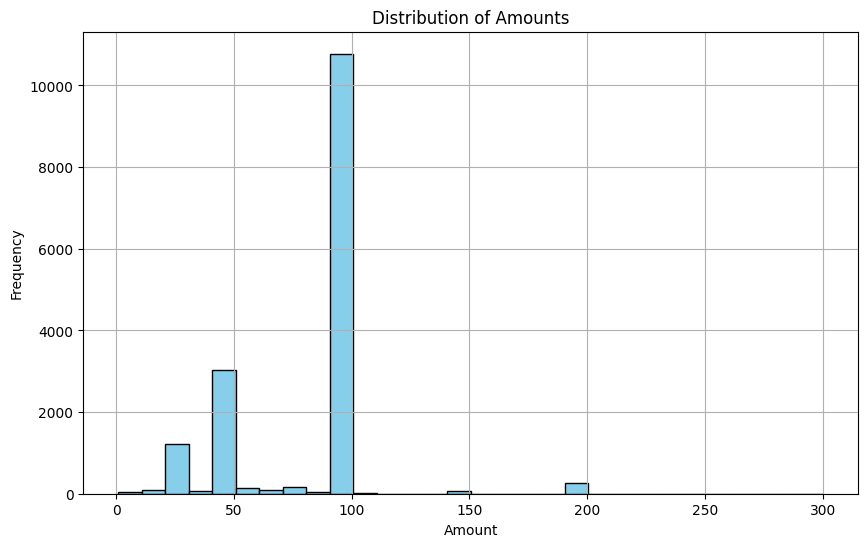

In [60]:
'''The bins are great to show the most common amounts that users are requesting
As we can see, there are a few big spenders above 130 and the great majority of users are asking for quantities around 100€'''

plt.figure(figsize=(10, 6))
plt.hist(users_accepted['amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [61]:
def classify_expense(amount):
    if amount > 130:
        return 'higher'
    elif 75 <= amount <= 130:
        return 'regular'
    else:
        return 'lower'

# with the data, we create a classification for higher, regular and lower spenders:
users_accepted = users_accepted.copy()
users_accepted.loc[:, 'user_expending'] = users_accepted['amount'].apply(classify_expense)

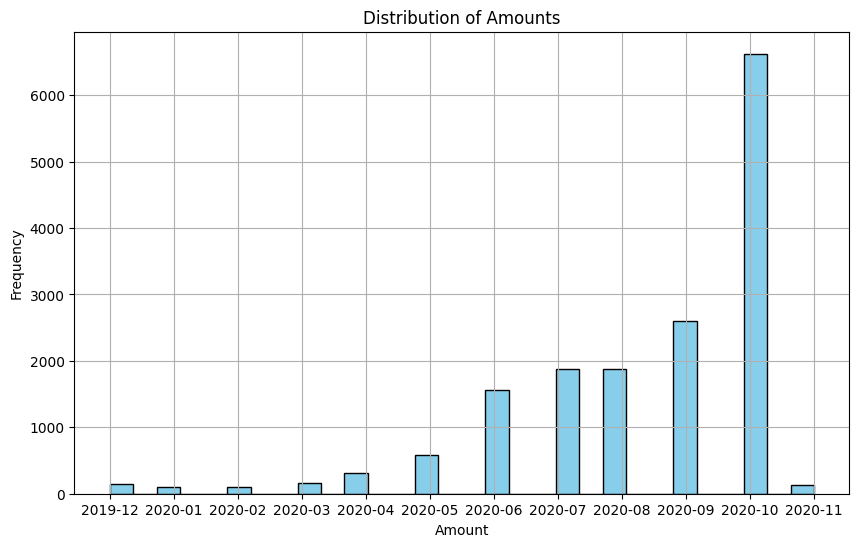

In [62]:
'''Here we can see how the amounts of accepted users are spread by cohort'''

plt.figure(figsize=(10, 6))
plt.hist(users_accepted['year_month'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

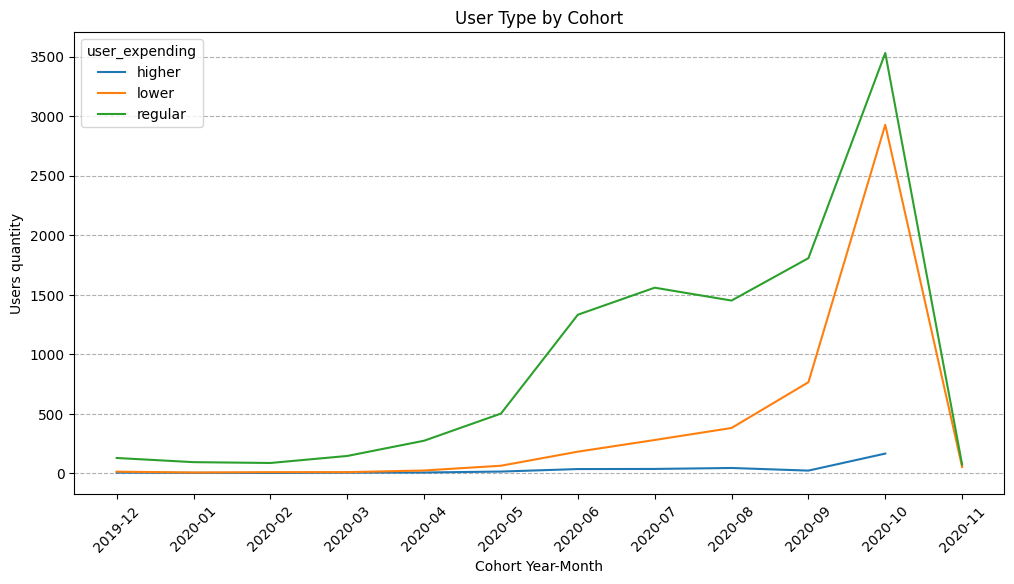

In [63]:
'''We then build a line chart showing the type of spenders
The leverage of the use of the service is made mostly by lower and regular spenders.
'''

user_freq = users_accepted.groupby(['year_month', 'user_expending'])['combined_id'].nunique().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='combined_id', hue='user_expending', data=user_freq)
plt.title('User Type by Cohort')
plt.xlabel('Cohort Year-Month')
plt.ylabel('Users quantity')
plt.grid(True, which='major', axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.show()

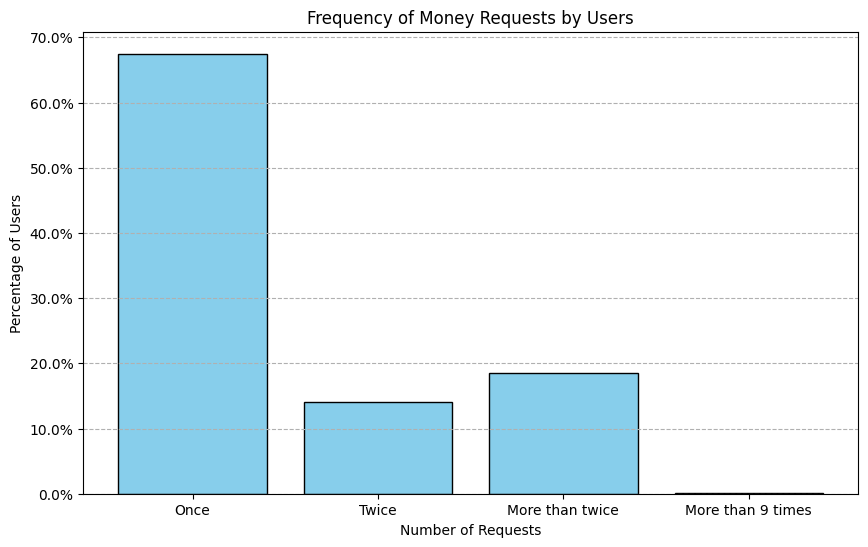

In [65]:
'''Here we create the chart to see if the users are mosty new users or returning users.
As a credit for education it makes sense to have users requesting money only once.
However the 1 time users have pretty high representativity.'''

user_counts = users_accepted['combined_id'].value_counts()

once = (user_counts == 1).sum()
twice = (user_counts == 2).sum()
more_than_twice = (user_counts > 2).sum()
more_than_9 = (user_counts > 9).sum()

total = len(user_counts)
categories = ['Once', 'Twice', 'More than twice', 'More than 9 times']
values = [once/total*100, twice/total*100, more_than_twice/total*100, more_than_9/total*100]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.title('Frequency of Money Requests by Users')
plt.xlabel('Number of Requests')
plt.ylabel('Percentage of Users')
plt.gca().yaxis.set_major_formatter('{:.1f}%'.format)
plt.grid(True, which='major', axis='y', linestyle='--')
plt.show()

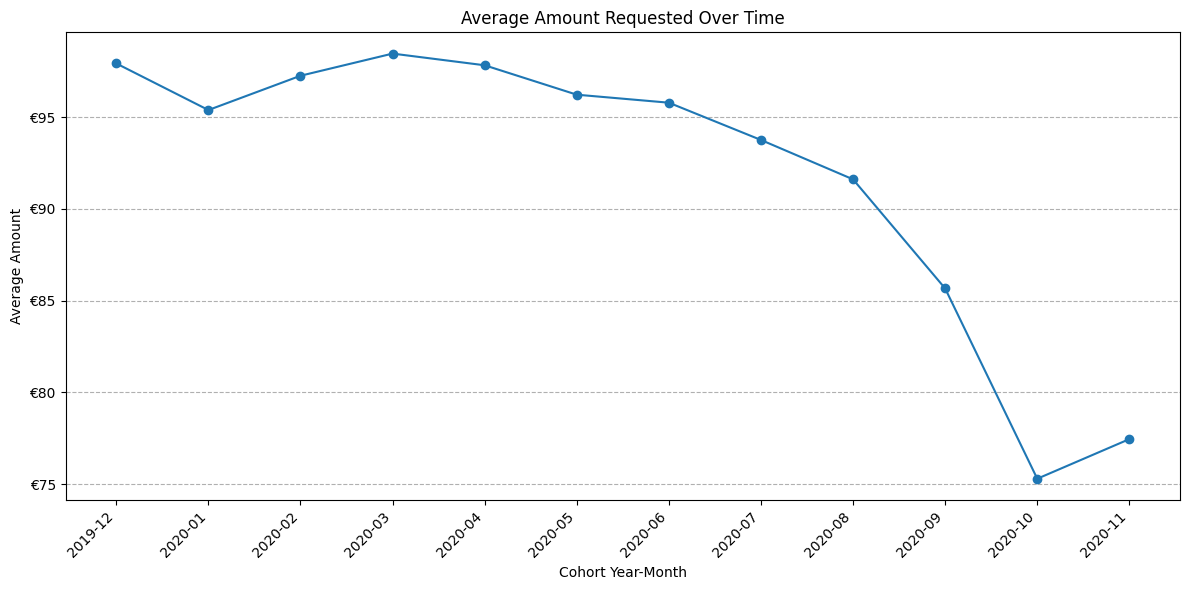

In [66]:
'''Here we check the flotation of the average requested.
As the User Type by Cohort has already shown, the low and regular spenders are the ones that weight the increase of users using the resource.
Therefore, the average of amount requested drops considerably around october 2020.
It looks exaggerated because the y axis is not at zero.'''

average_amount_by_month = users_accepted.groupby('year_month')['amount'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(average_amount_by_month['year_month'], average_amount_by_month['amount'], marker='o', linestyle='-')

plt.title('Average Amount Requested Over Time')
plt.xlabel('Cohort Year-Month')
plt.ylabel('Average Amount')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'€{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='major', axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [67]:
# The extract_fees file have the insights about the incidents. We start by selecting the columns we found relevant:

fees_columns = extract_fees[['cash_request_id', 'type', 'status', 'category', 'reason', 'created_at']]

In [68]:
#Similar to what we did with the cash_request, we extract year_month to map the cohorts:

fees_columns = fees_columns.copy()

fees_columns.loc[:, 'year_month'] = fees_columns['created_at'].dt.to_period('M')

In [69]:
fees_columns.head()

,cash_request_id,type,status,category,reason,created_at,year_month
0,14941,instant_payment,rejected,NaN,Instant Payment Cash Request,2020-09-07,2020-09
1,11714,incident,accepted,rejected_direct_debit,rejected direct debit,2020-09-09,2020-09
2,23371,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-23,2020-10
3,26772,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-31,2020-10
4,19350,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-06,2020-10


In [70]:
fees_columns['status'].value_counts() #We can see that status divide bewteen users that moved forward and those that don't.

,count
status,
accepted,14841
cancelled,4938
rejected,1194
confirmed,88


In [71]:
fees_status_map = {
    'accepted': 'accepted',
    'cancelled': 'rejected',
    'rejected': 'rejected',
    'confirmed': 'accepted'
}

# We use again a dictionary to create a simpler classification, in the accepted_rejected column
fees_columns['accepted_rejected'] = fees_columns['status'].map(fees_status_map)
fees_columns.sample(3)

,cash_request_id,type,status,category,reason,created_at,year_month,accepted_rejected
11206,13012,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-08-19,2020-08,accepted
20915,16731,instant_payment,rejected,NaN,Instant Payment Cash Request,2020-09-18,2020-09,rejected
15407,18089,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-09-27,2020-09,accepted


In [72]:
fees_columns['type'].value_counts() #The same happens with incident type

,count
type,
instant_payment,11099
postpone,7766
incident,2196


In [74]:
incident_status_map = {
    'instant_payment': 'successful',
    'postpone': 'successful',
    'incident': 'incident'
}

# Using the dictionary to create the incident_check column:
fees_columns['incident_check'] = fees_columns['type'].map(incident_status_map)
fees_columns.sample(20)

,cash_request_id,type,status,category,reason,created_at,year_month,accepted_rejected,incident_check
10920,6791,incident,accepted,rejected_direct_debit,rejected direct debit,2020-08-14,2020-08,accepted,incident
7593,15440,incident,rejected,rejected_direct_debit,rejected direct debit,2020-10-16,2020-10,rejected,incident
20089,25485,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-28,2020-10,accepted,successful
4703,16308,postpone,cancelled,NaN,Postpone Cash Request,2020-10-15,2020-10,rejected,successful
12518,10526,incident,accepted,rejected_direct_debit,rejected direct debit,2020-09-03,2020-09,accepted,incident
7877,17499,incident,accepted,rejected_direct_debit,rejected direct debit,2020-10-25,2020-10,accepted,incident
2303,6575,postpone,accepted,NaN,Postpone Cash Request,2020-07-31,2020-07,accepted,successful
2399,10451,postpone,accepted,NaN,Postpone Cash Request,2020-08-05,2020-08,accepted,successful
17509,11585,postpone,cancelled,NaN,Postpone Cash Request,2020-09-02,2020-09,rejected,successful
5980,22545,postpone,cancelled,NaN,Postpone Cash Request,2020-10-21,2020-10,rejected,successful


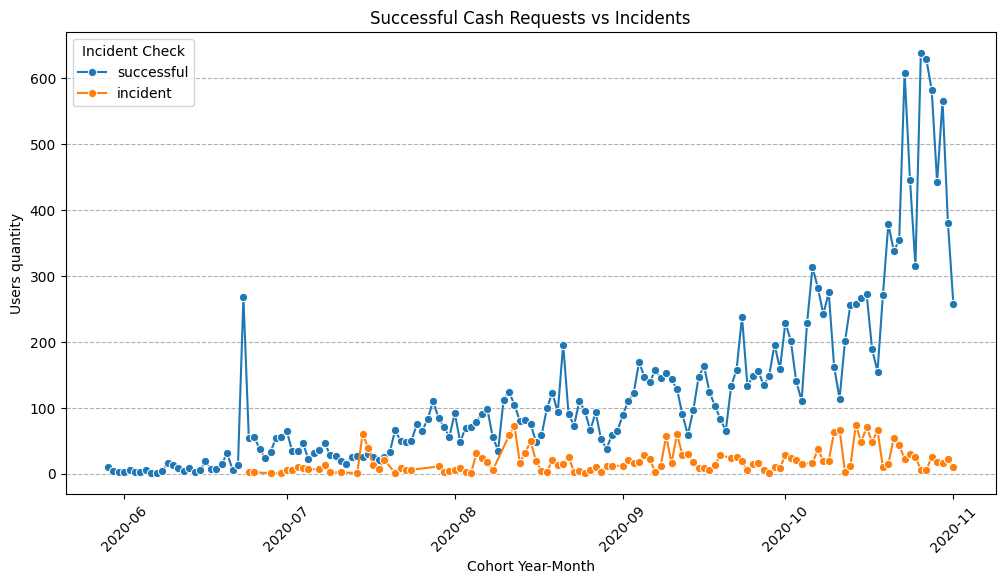

In [75]:
'''Here we create a chart to see how successful and failed users attempts evolve over time.
Despite the increase of users, the incidents don't follow the same trend.'''


users_per_incident = fees_columns.groupby(['created_at', 'incident_check']).agg({'cash_request_id': 'count'}).reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(x='created_at', y='cash_request_id', data=users_per_incident[users_per_incident['incident_check'] == 'successful'], label='successful', marker='o')

sns.lineplot(x='created_at', y='cash_request_id', data=users_per_incident[users_per_incident['incident_check'] == 'incident'], label='incident', marker='o')

plt.title('Successful Cash Requests vs Incidents')
plt.xlabel('Cohort Year-Month')
plt.ylabel('Users quantity')
plt.xticks(rotation=45)
plt.legend(title='Incident Check')
plt.grid(True, which='major', axis = 'y', linestyle='--')

plt.show()

In [76]:
#We run a Pearson's correlation to confirm that incidents and successful cash requests have almost no correlation. The result is less than 0.2, which confirms the weak correlation.

Correlation_incidents = fees_columns.groupby(['created_at', 'incident_check']).agg({'cash_request_id': 'count'}).reset_index()

pivot_incident_df = users_per_incident.pivot(index='created_at', columns='incident_check', values='cash_request_id')

correlation = pivot_incident_df['incident'].corr(pivot_incident_df['successful'])

print(f"Pearson's correlation between incidents and successful cash requests: {correlation:.2f}")

Pearson's correlation between incidents and successful cash requests: 0.18


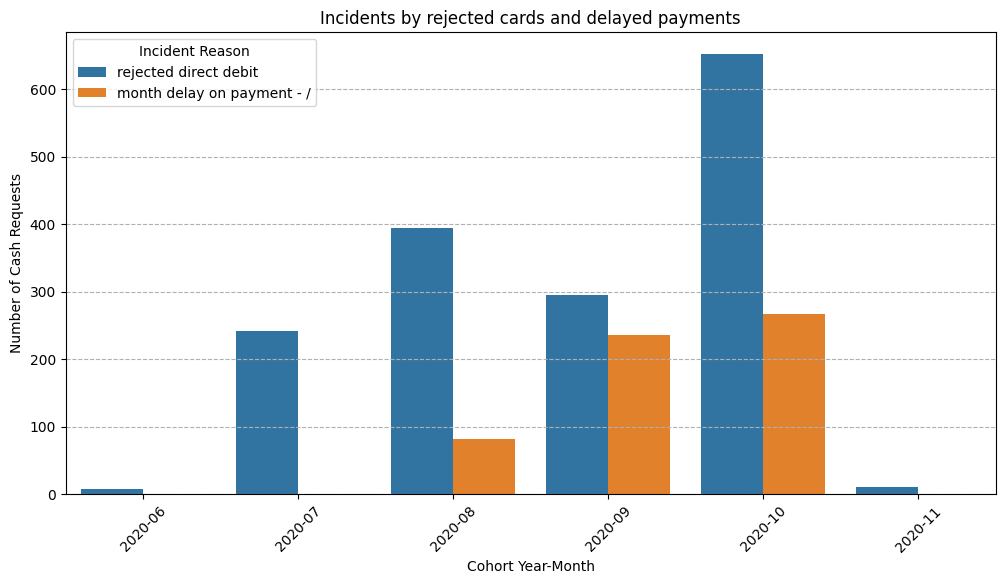

In [78]:
#With this bar chart we see the main reasons for incidents. The card rejection is way above payment delays.

incident_bar = fees_columns[fees_columns['incident_check'] == 'incident']

grouped_bar = incident_bar.groupby(['year_month', 'reason']).agg({'cash_request_id': 'nunique'}).reset_index()
plt.figure(figsize=(12, 6))

sns.barplot(x='year_month', y='cash_request_id', hue='reason', data=grouped_bar)

plt.title('Incidents by rejected cards and delayed payments')
plt.xlabel('Cohort Year-Month')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.legend(title='Incident Reason')
plt.grid(True, which='major', axis='y', linestyle='--')

plt.show()

In [79]:
#About the revenue, we mapped the income using the fees charge

rev_fees_columns = extract_fees[['cash_request_id', 'total_amount', 'type', 'status', 'category', 'reason', 'created_at', 'charge_moment']]

In [80]:
charged_users = rev_fees_columns.copy()

# Apply the mapping to create the 'incident_check' column again:
charged_users['incident_check'] = charged_users['type'].map(incident_status_map)

charged_users.sample(20)

,cash_request_id,total_amount,type,status,category,reason,created_at,charge_moment,incident_check
2228,12263,5.0,postpone,accepted,NaN,Postpone Cash Request,2020-10-07,before,successful
8471,25705,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-28,after,successful
12027,23703,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-23,after,successful
1313,9460,5.0,postpone,accepted,NaN,Postpone Cash Request,2020-07-24,before,successful
15641,2273,5.0,postpone,cancelled,NaN,Postpone Cash Request,2020-06-23,after,successful
459,25907,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-29,after,successful
5375,22428,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-20,after,successful
8342,9903,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-07-29,after,successful
13249,19139,5.0,instant_payment,accepted,NaN,Instant Payment Cash Request,2020-10-04,after,successful
2535,10003,5.0,postpone,accepted,NaN,Postpone Cash Request,2020-08-12,before,successful


In [81]:
#All the users who set to pay after and are rejected or have an unresolved incident, have no charges. All the rest pay the servicefee.

charged_users['charge_status'] = np.where(
    ((charged_users['charge_moment'] == 'after') & (charged_users['incident_check'] == 'incident')) |
    ((charged_users['charge_moment'] == 'after') & (charged_users['status'] == 'rejected')),
    'no_charge',
    'charged'
)


In [82]:
# We also extract the year_month
charged_users_ym = charged_users.copy()

charged_users_ym['year_month'] = charged_users['created_at'].dt.strftime('%Y-%m')

In [84]:
# We create a data frame with charged users only, by period

charges_filter = charged_users_ym[charged_users_ym['charge_status'] != 'no_charge'].groupby(['charge_status', 'cash_request_id', 'year_month'], as_index=False).agg({'total_amount': 'sum'})

charges_filter.head(10)




,charge_status,cash_request_id,year_month,total_amount
0,charged,0,2020-08,20.0
1,charged,1456,2020-06,5.0
2,charged,1503,2020-05,10.0
3,charged,1503,2020-06,5.0
4,charged,1518,2020-06,40.0
5,charged,1554,2020-06,10.0
6,charged,1554,2020-07,10.0
7,charged,1591,2020-06,10.0
8,charged,1602,2020-06,5.0
9,charged,1625,2020-05,5.0


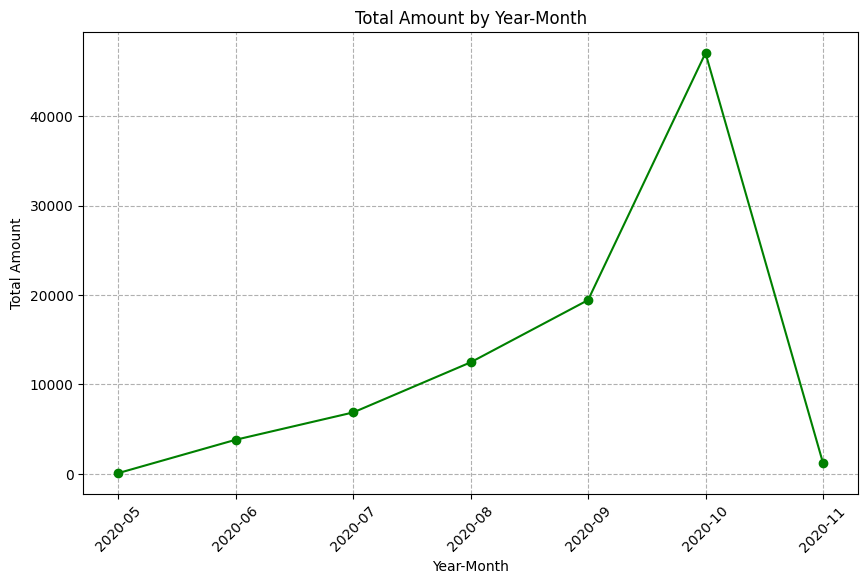

In [103]:
#Here we plot a revenue obtained by the fees during each cohort

charges_plot = charges_filter.groupby('year_month')['total_amount'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(charges_plot['year_month'].astype(str), charges_plot['total_amount'], marker='o', linestyle='-', color='green')
plt.title('Total Amount by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--')
plt.show()

In [105]:
#However, we saw the opportunity to answer questions about users approach and revenue in a combo chart
#First we filter the cohorts by may and above, to mach the data period with the extract_fee df

user_freq_filtered = user_freq[user_freq['year_month'] >= '2020-05']
user_freq_filtered.head()


,year_month,user_expending,combined_id
14,2020-05,higher,15
15,2020-05,lower,64
16,2020-05,regular,502
17,2020-06,higher,36
18,2020-06,lower,182


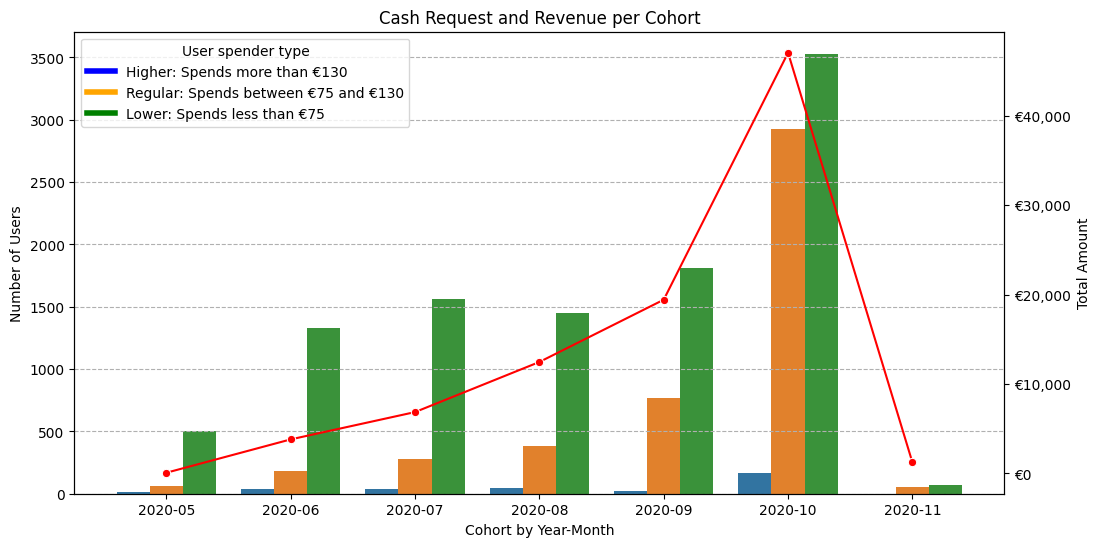

In [111]:
'''With the combo chart, we are able to quickly show the information in graphics that the audience can understand in a glance.'''


charges_filter = charges_filter.groupby('year_month')['total_amount'].sum().reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x='year_month', y='combined_id', hue='user_expending', data=user_freq_filtered, ax=ax1)
ax1.set_ylabel('Number of Users')
ax1.set_title('Cash Request and Revenue per Cohort')
ax2 = ax1.twinx()


sns.lineplot(x='year_month', y='total_amount', data=charges_filter, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Total Amount')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'€{x:,.0f}'))
ax1.set_xlabel('Cohort by Year-Month')

plt.xticks(rotation=45)


ax1.grid(True, linestyle='--', which='both', axis='y')
ax2.grid(False)


custom_lines = [
    plt.Line2D([0], [0], color='blue', lw=4),
    plt.Line2D([0], [0], color='orange', lw=4),
    plt.Line2D([0], [0], color='green', lw=4)
]

custom_labels = [
    'Higher: Spends more than €130',
    'Regular: Spends between €75 and €130',
    'Lower: Spends less than €75'
]


ax1.legend(custom_lines, custom_labels, title='User spender type', loc='upper left')

plt.show()